In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import tensorflow as tf
import os
import glob
from google.colab import drive
import difflib

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149806 sha256=44b9ce1d64d769c7abec8b1fd206d7f5de6093aeb0b8e01012177530f1449db3
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


In [ ]:
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf

In [ ]:
cat=input("Enter Clothe Category")
print(cat)

Enter Clothe Categorypants
pants


In [ ]:
 cutoff=70
 labl=np.array([0]*20)
 from fuzzywuzzy import fuzz
 from fuzzywuzzy import process
 if (fuzz.token_set_ratio((cat), "T-Shirt")) > cutoff:
   labl[0]=fuzz.token_set_ratio((cat), "T-Shirt")
 elif(fuzz.token_set_ratio((cat), "top")) > cutoff:
    labl[1]=fuzz.token_set_ratio((cat), "top" ) 
 elif(fuzz.token_set_ratio((cat), "trouser")) > cutoff:
    labl[2]=fuzz.token_set_ratio((cat), "trouser")
 elif(fuzz.token_set_ratio((cat), "Pullover")) > cutoff:
    labl[3]=fuzz.token_set_ratio((cat), "Pullover")
 elif(fuzz.token_set_ratio((cat), "Dress")) > cutoff:
    labl[4]=fuzz.token_set_ratio((cat), "Dress")
 elif(fuzz.token_set_ratio((cat), "Coat")) > cutoff:
    labl[5]=fuzz.token_set_ratio((cat), "Coat")
 elif(fuzz.token_set_ratio((cat), "Sandal")) > cutoff:
    labl[6]=fuzz.token_set_ratio((cat), "Sandal")
 elif(fuzz.token_set_ratio((cat), "Shirt")) > cutoff:
    labl[7]=fuzz.token_set_ratio((cat), "Shirt")     
 elif(fuzz.token_set_ratio((cat), "Sneaker")) > cutoff:
    labl[8]=fuzz.token_set_ratio((cat), "Sneaker")
 elif(fuzz.token_set_ratio((cat), "Bag")) > cutoff:
    labl[9]=fuzz.token_set_ratio((cat), "Bag")
 elif(fuzz.token_set_ratio((cat), "Ankle Boot")) > cutoff:
    labl[10]=fuzz.token_set_ratio((cat), "Ankle Boot") 
 else:
      labl[10]=int(fuzz.token_set_ratio((cat), "Ankle Boot") )
      print("No match") 
print(labl)
result = np.where(labl == np.amax(labl))
print(result[0])
if result[0]==0:
  lb=0
if result[0]==1:
  lb=0
if result[0]==2:
  lb=1
if result[0]==3:
  lb=2
if result[0]==4:
  lb=3
if result[0]==5:
  lb=4
if result[0]==6:
  lb=5
if result[0]==7:
  lb=6
if result[0]==8:
  lb=7
if result[0]==9:
  lb=8              
if result[0]==10:
  lb=9
  print (lab1)
  

[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
[0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

 colab				       ML1.ipynb
'Copy of NLP tensorflow tokenizer 1'  'NLP tensorflow tokenizer 1'
'Copy of Welcome To Colaboratory'      Untitled0.ipynb
 exchangerate			       Untitled1.ipynb
 fashion-mnist_test.csv		       Untitled2.ipynb
 fashion-mnist_train.csv


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df = pd.DataFrame(train_data)
#print(df.shape)
#X_train1 = df[df.label==labl]
#X_train1.head()

In [ ]:
X_train = train_data.drop('label',axis=1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train=X_train.values
print(X_train.shape)

(60000, 784)


In [ ]:
#X_train =X_train.values
#print(X_train.shape)

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


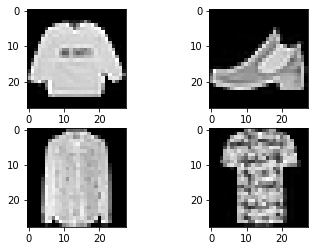

In [ ]:
fig,axe=plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [ ]:
X_train =  X_train.astype('float32')

In [ ]:
X_train = X_train/255
X_train = X_train*2 - 1.

In [ ]:
print(X_train.max(),X_train.min())

-1.0077816 -1.0079046


In [ ]:
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_shape=[100]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         1601      
Total params: 840,705
Trainable params: 840,321
Non-trainable params: 384
________________________________________________

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [ ]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.layers

In [ ]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [ ]:
epochs = 30
batch_size = 100
noise_shape=100

Currently on Epoch 1
	Currently on batch number 5 of 600
	Currently on batch number 10 of 600
	Currently on batch number 15 of 600
	Currently on batch number 20 of 600
	Currently on batch number 25 of 600
	Currently on batch number 30 of 600
	Currently on batch number 35 of 600
	Currently on batch number 40 of 600
	Currently on batch number 45 of 600
	Currently on batch number 50 of 600
	Currently on batch number 55 of 600
	Currently on batch number 60 of 600
	Currently on batch number 65 of 600
	Currently on batch number 70 of 600
	Currently on batch number 75 of 600
	Currently on batch number 80 of 600
	Currently on batch number 85 of 600
	Currently on batch number 90 of 600
	Currently on batch number 95 of 600
	Currently on batch number 100 of 600
	Currently on batch number 105 of 600
	Currently on batch number 110 of 600
	Currently on batch number 115 of 600
	Currently on batch number 120 of 600
	Currently on batch number 125 of 600
	Currently on batch number 130 of 600
	Currently 

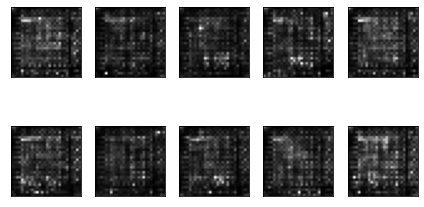

Currently on Epoch 2
	Currently on batch number 5 of 600
	Currently on batch number 10 of 600
	Currently on batch number 15 of 600
	Currently on batch number 20 of 600
	Currently on batch number 25 of 600
	Currently on batch number 30 of 600
	Currently on batch number 35 of 600
	Currently on batch number 40 of 600
	Currently on batch number 45 of 600
	Currently on batch number 50 of 600
	Currently on batch number 55 of 600
	Currently on batch number 60 of 600
	Currently on batch number 65 of 600
	Currently on batch number 70 of 600
	Currently on batch number 75 of 600
	Currently on batch number 80 of 600
	Currently on batch number 85 of 600
	Currently on batch number 90 of 600
	Currently on batch number 95 of 600
	Currently on batch number 100 of 600
	Currently on batch number 105 of 600
	Currently on batch number 110 of 600
	Currently on batch number 115 of 600
	Currently on batch number 120 of 600
	Currently on batch number 125 of 600
	Currently on batch number 130 of 600
	Currently 

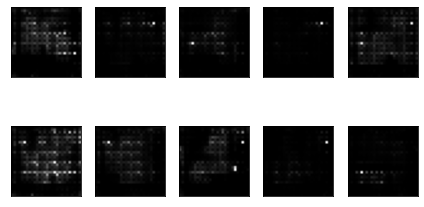

Currently on Epoch 12
	Currently on batch number 5 of 600
	Currently on batch number 10 of 600
	Currently on batch number 15 of 600
	Currently on batch number 20 of 600
	Currently on batch number 25 of 600
	Currently on batch number 30 of 600
	Currently on batch number 35 of 600
	Currently on batch number 40 of 600
	Currently on batch number 45 of 600
	Currently on batch number 50 of 600
	Currently on batch number 55 of 600
	Currently on batch number 60 of 600
	Currently on batch number 65 of 600
	Currently on batch number 70 of 600
	Currently on batch number 75 of 600
	Currently on batch number 80 of 600
	Currently on batch number 85 of 600
	Currently on batch number 90 of 600
	Currently on batch number 95 of 600
	Currently on batch number 100 of 600
	Currently on batch number 105 of 600
	Currently on batch number 110 of 600
	Currently on batch number 115 of 600
	Currently on batch number 120 of 600
	Currently on batch number 125 of 600
	Currently on batch number 130 of 600
	Currently

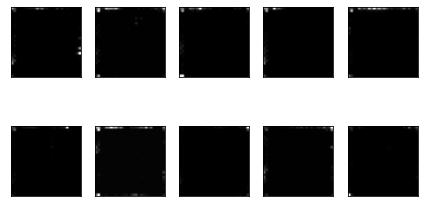

Currently on Epoch 22
	Currently on batch number 5 of 600
	Currently on batch number 10 of 600
	Currently on batch number 15 of 600
	Currently on batch number 20 of 600
	Currently on batch number 25 of 600
	Currently on batch number 30 of 600
	Currently on batch number 35 of 600
	Currently on batch number 40 of 600
	Currently on batch number 45 of 600
	Currently on batch number 50 of 600
	Currently on batch number 55 of 600
	Currently on batch number 60 of 600
	Currently on batch number 65 of 600
	Currently on batch number 70 of 600
	Currently on batch number 75 of 600
	Currently on batch number 80 of 600
	Currently on batch number 85 of 600
	Currently on batch number 90 of 600
	Currently on batch number 95 of 600
	Currently on batch number 100 of 600
	Currently on batch number 105 of 600
	Currently on batch number 110 of 600
	Currently on batch number 115 of 600
	Currently on batch number 120 of 600
	Currently on batch number 125 of 600
	Currently on batch number 130 of 600
	Currently

In [ ]:
with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    
    
    for i in range(X_train.shape[0]//batch_size):
        
        if (i+1)%5 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")
            
        noise=np.random.normal(size=[batch_size,noise_shape])
       
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = X_train[i*batch_size:(i+1)*batch_size]
       
        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)
        
        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)
        
        
        #training generator 
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False #while training the generator as combined model,discriminator training should be turned off
        
        d_g_loss_batch =GAN.train_on_batch(noise, train_label)
        
        
        
       
    #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))
        print(x_fake)

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

        
        
print('Training is complete')

In [ ]:
noise=np.random.normal(loc=0, scale=1, size=(100,noise_shape))

gen_image = generator.predict(noise)
print(d_loss_fake)
print(d_loss_real)
print(d_g_loss_batch)

0.5600807666778564
0.6307172179222107
1.160010814666748


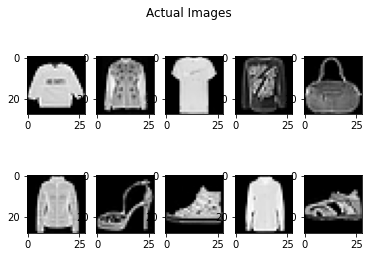

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle("Actual Images")
idx = 0
for i in range(2):
    for j in range(5):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=5

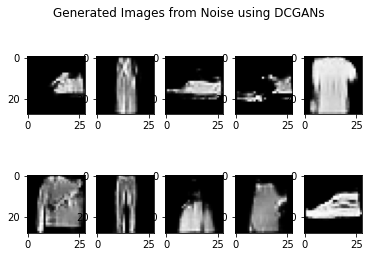

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using DCGANs')
idx=0
for i in range(2):
     for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=3